# 카카오지도 4대궁 리뷰 웹크롤링

In [4]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from bs4 import BeautifulSoup

In [5]:
import pandas as pd
driver = webdriver.Chrome("/Users/yeonju1/Documents/bigData/src/07_Python/chromedriver")

items = ['경복궁', '창덕궁', '창경궁', '덕수궁']
count = 0
current = 0
goal = len(items)
for item in items :
    current += 1
    print('진행상황 : ', current,'/',goal,sep="")
    driver.get("https://map.kakao.com/") # 카카오 지도 열기
    searchbox = driver.find_element_by_xpath("//input[@id='search.keyword.query']") # 검색창에 입력
    searchbox.send_keys(item)
    time.sleep(2)
    searchbutton = driver.find_element_by_xpath("//button[@id='search.keyword.submit']") # 검색버튼 누름
    driver.execute_script("arguments[0].click();", searchbutton)
    time.sleep(2)
    if len(driver.find_elements_by_xpath("//a[@class='moreview']")) != 0:
        print('검색결과 리뷰존재')
        driver.execute_script('window.open("about:blank", "_blank");') # 새 탭 열기
        reviewbutton = driver.find_element_by_xpath("//a[@class='numberofscore']")
        time.sleep(2)
        content_url = reviewbutton.get_attribute("href") 
        tabs = driver.window_handles
        driver.switch_to_window(tabs[1]) # 새 탭으로 이동
        driver.get(content_url) # 링크 열기
        time.sleep(3)
        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        review_lists = soup.select('.list_evaluation > li')
        if len(review_lists) != 0 :
            for i, review in enumerate(review_lists) :
                user_review = review.select('.txt_comment > span') # 리뷰
                try:
                    row = {"ItemID":item}
                    row = pd.DataFrame(row, index=[i])
                    #rating_df = rating_df.append(row,ignore_index=True)
                    review_row = {"ItemID":item, "review":user_review[0].text}
                    review_row = pd.DataFrame(review_row, index=[i])
                    #review_elem = pd.DataFrame(review_row, index=[i])
                    review_elem = review_elem.append(review_row, ignore_index = True)
                    time.sleep(1)
                except:
                    row = {"ItemID":item}
                    row = pd.DataFrame(row, index=[i])
                    #rating_df = rating_df.append(row,ignore_index=True)
                    review_row = {"ItemID":item, "review":user_review[0].text}
                    review_row = pd.DataFrame(review_row, index=[i])
                    review_elem = pd.DataFrame(review_row, index=[i])
                    review_elem = review_elem.append(review_row, ignore_index = True)
        else :
            print("리뷰가 없습니다")
        try:
            for i in range(2,500):
                time.sleep(3)
                another_review = driver.find_element_by_xpath("//a[@data-page='" + str(i) + "']")
                another_review.click()
                time.sleep(3)
                html = driver.page_source
                soup = BeautifulSoup(html, 'html.parser')
                review_lists = soup.select('.list_evaluation > li')
                if len(review_lists) != 0 :
                    for i, review in enumerate(review_lists) :
                        user_review = review.select('.txt_comment > span') # 리뷰
                        try:
                            row = {"ItemID":item}
                            row = pd.DataFrame(row, index=[i])
                            #rating_df = rating_df.append(row,ignore_index=True)
                            review_row = {"ItemID":item, "review":user_review[0].text}
                            review_row = pd.DataFrame(review_row, index=[i])
                            #review_elem = pd.DataFrame(review_row, index=[i])
                            review_elem = review_elem.append(review_row, ignore_index = True)
                            time.sleep(1)
                        except:
                            row = {"ItemID":item}
                            row = pd.DataFrame(row, index=[i])
                            #rating_df = rating_df.append(row,ignore_index=True)
                            review_row = {"ItemID":item, "review":user_review[0].text}
                            review_row = pd.DataFrame(review_row, index=[i])
                            #review_elem = pd.DataFrame(review_row, index=[i])
                            review_elem = review_elem.append(review_row, ignore_index = True)
        except:
            print("더 이상 리뷰 존재 X")
            driver.close()
        driver.switch_to_window(tabs[0])
        print("검색 페이지로 돌아감")
    else:
        print("검색결과 리뷰없음")

진행상황 : 1/4
검색결과 리뷰존재


<ipython-input-5-755265521cb0>:25: DeprecationWarning: use driver.switch_to.window instead
  driver.switch_to_window(tabs[1]) # 새 탭으로 이동


더 이상 리뷰 존재 X
검색 페이지로 돌아감
진행상황 : 2/4


<ipython-input-5-755265521cb0>:85: DeprecationWarning: use driver.switch_to.window instead
  driver.switch_to_window(tabs[0])


검색결과 리뷰존재
더 이상 리뷰 존재 X
검색 페이지로 돌아감
진행상황 : 3/4
검색결과 리뷰존재
더 이상 리뷰 존재 X
검색 페이지로 돌아감
진행상황 : 4/4
검색결과 리뷰존재
더 이상 리뷰 존재 X
검색 페이지로 돌아감


In [6]:
review_elem.tail(15)

,ItemID,review
331,덕수궁,"If you want to go to a palace, go to a bigger ..."
332,덕수궁,최고에요♥
333,덕수궁,
334,덕수궁,
335,덕수궁,
336,덕수궁,
337,덕수궁,걷기 좋은곳
338,덕수궁,
339,덕수궁,사진찍기도좋고 산책하기도좋고
340,덕수궁,한국근현대미술전 보고 덕수궁미술관에서


In [7]:
review_elem['review'].replace('', np.nan, inplace=True)

In [8]:
missing_cnt = review_elem.isna().sum() # 결측치 갯수 확인
missing_cnt

ItemID      0
review    201
dtype: int64

In [9]:
review_elem.dropna(inplace=True)

In [10]:
review_elem

,ItemID,review
6,경복궁,별 하나도 주기 아까움~~
9,경복궁,너무나도 아름다운 우리의 문화유산
15,경복궁,좋아요
22,경복궁,"일년.. 365일..사시사철.. 봄,여름,가을,겨울 1/4~4/4분기 그 어느때 ..."
27,경복궁,대한민국 최고의 관광명소~~
...,...,...
337,덕수궁,걷기 좋은곳
339,덕수궁,사진찍기도좋고 산책하기도좋고
340,덕수궁,한국근현대미술전 보고 덕수궁미술관에서
342,덕수궁,단풍이곱게들다


In [11]:
for row in review_elem['review']:
    print(''.join(row))

별 하나도 주기 아까움~~
너무나도 아름다운 우리의 문화유산
좋아요
일년..  365일..사시사철.. 봄,여름,가을,겨울 1/4~4/4분기 그 어느때 가도 좋은곳! 아 참 쪄 죽는 한 여름은 빼자!  초록이 짙터 그 짙음에 지쳐 단풍 드는 가을에도..  그 단풍이 싫어 온통 하얗게 덮어 짓눌러 버리는 겨울에도..  그 못된 횡포에도 사부작 사부작 움터 알록달록 울긋불긋 돋아나 물이 오르는 봄에도,.  행여나 그 귀한 봄이 ...
대한민국 최고의 관광명소~~
역시 대한민국 
좋아요
좋아요
경회루가 특히 아름답습니다! 
경복궁 복원이 빨리 진행되길 기원합니다.
근정전 볼만함
그냥 넓기만 하고 별로 아름다움이 느껴지지 않는다. 한국은 예나 지금이나 건축은 정말 못하는 듯
최고
최고예요 
중국인이 너무 많았음
무료개방 좋아여 광화문 거리 지나가다 심심하면 한 번씩 올 수 있네요
아름다워요
가볼만함
설명없는 별하나들 친일이지? ㅋ ♩♪♪들
들어 가지 마시오란 문구만 기억에 많다. 어서와 한국은 처음이지의 스위스친구들처럼 모르는 물건들이 덩그러니. 설명도 없고 깨끗해서 청소 할 필요도 없는데 관리비는 어디 지출이 되는건지. 장급들을 없애고 행사를 많이 보여 주든가 휑한 건물만 들여다보고 재미가 없다. 디테일한 설명서든 (들어가세요! 해보세요!)가 많았으면 좋겠다. 영어 헤드셋, 한글헤드셋을 쓰...
좋아요
경복궁은 그냥 이쁘고 멋있어요
예쁘고 좋아요.
너무 멋져
ɢᴏᴏᴅ 
멋짐      
대한민국 건축은 예술이다
경복궁도 몇년만에 가보는거고 야간개장은 처음이었는데 너무 좋았어요. 궁궐도 정말 아름답고 조명도 은은하면서 그윽한게 확실히 운치가 있네요.  코로나로 국내의 이곳저곳을 많이 다녀보면서 느낀 점은 우리나라도 참 멋지고 흥미로운 문화유산이 많다는 것 같아요.. 내년에 또 가고 싶네요♥️
산책하기 넘 좋은곳 이쁘다
.
야간개장 감사합니다.
대한민국 수도의 중심이었던 곳. 화려한 장식과 수려한 궁들이 즐비한 이곳. 가끔 노을 보며 구경하면 최고입니다. 이번에 코로나땜에

In [12]:
review_text = ' '.join(review_elem['review'])
review_text[:500]

'별 하나도 주기 아까움~~ 너무나도 아름다운 우리의 문화유산 좋아요 일년..  365일..사시사철.. 봄,여름,가을,겨울 1/4~4/4분기 그 어느때 가도 좋은곳! 아 참 쪄 죽는 한 여름은 빼자!  초록이 짙터 그 짙음에 지쳐 단풍 드는 가을에도..  그 단풍이 싫어 온통 하얗게 덮어 짓눌러 버리는 겨울에도..  그 못된 횡포에도 사부작 사부작 움터 알록달록 울긋불긋 돋아나 물이 오르는 봄에도,.  행여나 그 귀한 봄이 ... 대한민국 최고의 관광명소~~ 역시 대한민국  좋아요 좋아요 경회루가 특히 아름답습니다!  경복궁 복원이 빨리 진행되길 기원합니다. 근정전 볼만함 그냥 넓기만 하고 별로 아름다움이 느껴지지 않는다. 한국은 예나 지금이나 건축은 정말 못하는 듯 최고 최고예요  중국인이 너무 많았음 무료개방 좋아여 광화문 거리 지나가다 심심하면 한 번씩 올 수 있네요 아름다워요 가볼만함 설명없는 별하나들 친일이지? ㅋ ♩♪♪들 들어 가지 마시오란 문구만 기억에 많다. 어서와 한국'

## 자연어처리

In [13]:
# 명사들 추출
from konlpy.tag import Komoran
komoran = Komoran(max_heap_size=2024)
word_list = komoran.nouns('%r' % review_text)
print('명사 출현 빈도 : ', len(word_list))
print('출현 명사 갯수 : ', len(set(word_list))) # set() : 중복제거
print('한 단어당 평균 반복 횟수 : ', len(word_list) / len(set(word_list)))
print(type(word_list))
print(word_list[:10])

명사 출현 빈도 :  641
출현 명사 갯수 :  339
한 단어당 평균 반복 횟수 :  1.8908554572271385
<class 'list'>
['문화유산', '일', '년', '일', '사시', '사철', '봄', '여름', '가을', '겨울']


In [14]:
# 워드 클라우드 할 text는 리스트를 하나의 연결된 문자여야 함 : '대한민국 헌번 유구 한 ~' 
text = ' '.join(word_list) # join사용해서 스페이스로 연결
text[:100]

'문화유산 일 년 일 사시 사철 봄 여름 가을 겨울 분기 때 가도 곳 여름 초록 단풍 가을 단풍 겨울 횡포 부작 부작 물 봄 봄이 대한민국 최고 관광 명소 대한민국 경회루 경복궁 복'

(-0.5, 399.5, 199.5, -0.5)

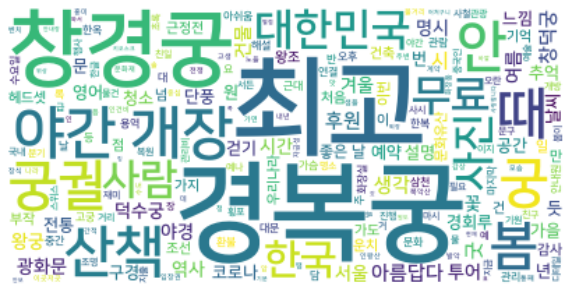

In [19]:
# 불용어 처리(불용어 지정 + 불용어 사전)
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS
불용어 = STOPWORDS | set(['수', '곳', '것'])
불용어 = set(['수', '곳', '것'])

wordcloud = WordCloud(background_color='white',
                     max_words=200,
                     font_path='library/Fonts/NanumSquareOTFBold.otf',
                     relative_scaling=0.2,
                     stopwords=불용어)
wordcloud.generate(text)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In [16]:
# 마스킹
from PIL import Image
import numpy as np
img = Image.open('data/pic1.png').convert('RGBA')
mask = np.array(img)

(-0.5, 1749.5, 1407.5, -0.5)

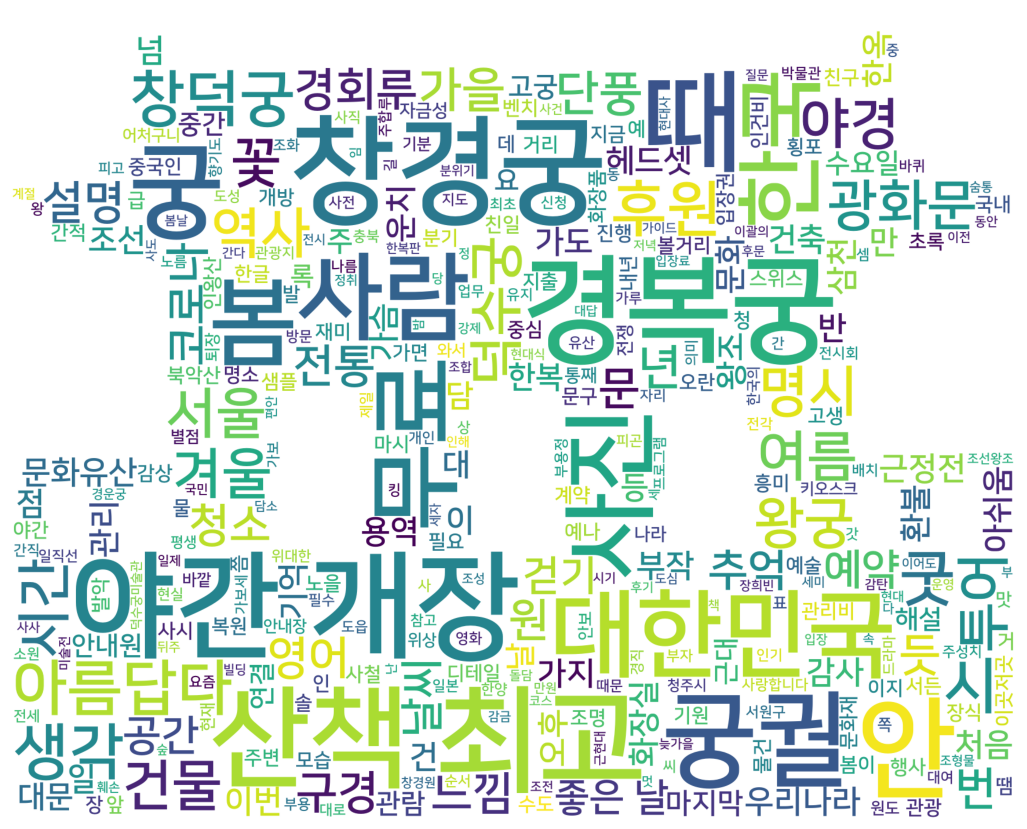

In [21]:
from wordcloud import STOPWORDS
불용어 = STOPWORDS | set(['수', '곳', '것'])
불용어 = set(['수', '곳', '것'])

wordcloud = WordCloud(background_color='white',
                     max_words=700,
                     font_path='library/Fonts/NanumSquareOTFBold.otf',
                     relative_scaling=0.3,
                     stopwords=불용어,
                     mask=mask)
wordcloud.generate(text)
plt.figure(figsize=(20,15))
plt.imshow(wordcloud)
plt.axis('off')

In [ ]:
# 생성된 wordcloud 저장
wordcloud.to_file('test3_wordcloud.png')

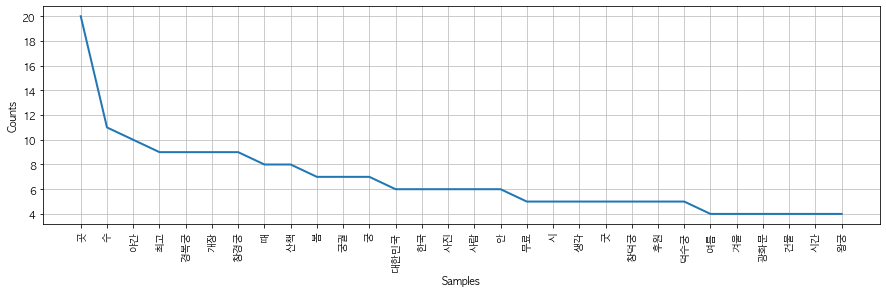

In [22]:
# 단어 빈도수 시각화(Text)
import nltk
import matplotlib.pyplot as plt
from konlpy.tag import Kkma
kka = Kkma()
tagged_data = kka.pos(text, 56) #tagged_data = kka.pos(data, 56)
nouns_list = [t[0] for t in tagged_data if t[1]=='NNG']
nouns_list[:10]
plt.rc('font', family='AppleGothic')
plt.figure(figsize=(15,4))
nltk.Text(nouns_list).plot(30)

In [23]:
# 정렬된 wordcount
from nltk import FreqDist
dic = dict(FreqDist(nouns_list))
wordcnt = pd.Series(dic)
wordcnt.sort_values(ascending=False, inplace=True)
wordcnt.head(10)

곳      20
수      11
야간     10
창경궁     9
개장      9
최고      9
경복궁     9
때       8
산책      8
궁       7
dtype: int64